In [74]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style(style="darkgrid")
plt.style.use('seaborn-v0_8-darkgrid')

In [75]:
crop_types = ['alfalfa', 'corn_grain', 'corn_silage', 'cotton_upland', 'hay', 'rice', 'soybeans', 'spring_wheat', 'winter_wheat']
crop_dict = { crop: [] for crop in crop_types }

In [76]:
for crop in crop_types:
    for i in range(2010, 2021):
        try:
            df = pd.read_csv(f'./data/data-with-target/{crop}/CountiesStats_WithTarget_{crop}_{i}.csv')
            crop_dict[crop].append(df)
        except FileNotFoundError:
            pass


In [77]:
'''
for corn, array in crop_dict.items():
    if corn == 'alfalfa' or corn == 'hay':
        pass
    i = 2010
    for df in array:
        try:
            df.drop(columns='pct_shrubland', inplace=True, errors='raise')
            df.rename(columns={'Value': 'Yeild'}, inplace=True)
        except:
            pass
        df['fire_frequency'] = df['fire_frequency'].fillna(0)
        if ((corn == 'alfalfa' or corn == 'hay') and i == 2019):
            i += 1
        df.to_csv(f'./data/data-with-target/{corn}/CountiesStats_WithTarget_{corn}_{i}.csv', index=False)  
        i += 1      
'''

"\nfor corn, array in crop_dict.items():\n    if corn == 'alfalfa' or corn == 'hay':\n        pass\n    i = 2010\n    for df in array:\n        try:\n            df.drop(columns='pct_shrubland', inplace=True, errors='raise')\n            df.rename(columns={'Value': 'Yeild'}, inplace=True)\n        except:\n            pass\n        df['fire_frequency'] = df['fire_frequency'].fillna(0)\n        if ((corn == 'alfalfa' or corn == 'hay') and i == 2019):\n            i += 1\n        df.to_csv(f'./data/data-with-target/{corn}/CountiesStats_WithTarget_{corn}_{i}.csv', index=False)  \n        i += 1      \n"

In [78]:
crop_df_dict = {
    crop: pd.concat(crop_dict[crop], ignore_index=True) for crop in crop_types
}

In [79]:
for crop, df in crop_df_dict.items():
    print(f"Total NaN values in {crop}:")
    print(df.isna().mean())

Total NaN values in alfalfa:
DMC                    0.0
EDDI                   0.0
FFMC                   0.0
GEOID                  0.0
NDMI_mean              0.0
NDVI_mean              0.0
ann_dewpoint           0.0
ann_humidity           0.0
ann_precip             0.0
ann_temp               0.0
bfi                    0.0
fall_frost_days        0.0
fire_frequency         0.0
first_fall_frost       0.0
frost_days             0.0
fuel_load              0.0
growing_season_days    0.0
heat_index             0.0
lai                    0.0
last_spring_frost      0.0
pct_tree_cover         0.0
slope_deg              0.0
soil_organic_C         0.0
soil_pH                0.0
soil_quality_index     0.0
soil_texture           0.0
spring_frost_days      0.0
topo_index             0.0
wind_chill             0.0
Yeild                  0.0
dtype: float64
Total NaN values in corn_grain:
DMC                    0.0
EDDI                   0.0
FFMC                   0.0
GEOID                  0.0
NDMI_m

In [80]:
for crop, df in crop_df_dict.items():
    plt.figure(figsize=(20, 20))
    sns.heatmap(df.select_dtypes(include='number').corr(), annot=True, fmt='.2f', cmap='coolwarm')
    plt.savefig(f'./figures/heatmaps/{crop}_heatmap.png', dpi=300, bbox_inches='tight')
    plt.close()

In [81]:
crop_df_dict['corn_grain'].sample(5).T

,5353,15283,4881,11339,12425
DMC,67.013035,94.687703,74.462268,91.538774,82.452397
EDDI,0.462399,0.427979,1.086936,0.641168,0.122824
FFMC,66.642742,71.301735,68.984158,69.346140,68.929109
GEOID,19027.000000,13201.000000,24029.000000,18037.000000,24033.000000
NDMI_mean,0.156314,0.130261,0.178390,0.174853,0.167172
NDVI_mean,0.381182,0.583481,0.304314,0.609379,0.580037
ann_dewpoint,276.022422,285.964497,281.640017,281.224553,281.043294
ann_humidity,67.206925,66.356306,65.988648,64.170782,63.094518
ann_precip,0.075417,0.099758,0.081077,0.099470,0.089444
ann_temp,281.754735,292.384025,287.936077,287.921725,287.994052


#### Baseline
Linear regression with L1 & L2 regularizations

In [82]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import root_mean_squared_error, mean_absolute_error, r2_score

In [83]:
dict_X = {
    crop: df.drop(columns=['GEOID', 'Yeild']) for crop, df in crop_df_dict.items()
}
dict_y = {
    crop: df['Yeild'] for crop, df in crop_df_dict.items()
}

dict_X_train = {}
dict_X_test = {}
dict_y_train = {}
dict_y_test = {}
for crop in crop_types:
    X_train, X_test, y_train, y_test = train_test_split(dict_X[crop], dict_y[crop], test_size=0.3, random_state=42)
    dict_X_train[crop] = X_train
    dict_X_test[crop] = X_test
    dict_y_train[crop] = y_train
    dict_y_test[crop] = y_test

dict_LinReg = {}
dict_Ridge = {}
dict_Lasso = {}

for crop in crop_types:
    linreg_pipe = make_pipeline(LinearRegression())
    ridge_pipe = make_pipeline(Ridge(alpha=1.0, solver = 'auto', max_iter=10000))
    lasso_pipe = make_pipeline(Lasso(alpha=1.0, max_iter=10000))
    dict_LinReg[crop] = linreg_pipe.fit(dict_X_train[crop], dict_y_train[crop])
    dict_Ridge[crop] = ridge_pipe.fit(dict_X_train[crop], dict_y_train[crop])
    dict_Lasso[crop] = lasso_pipe.fit(dict_X_train[crop], dict_y_train[crop])

In [84]:
dict_LinReg_pred = {}
dict_Ridge_pred = {}
dict_Lasso_pred = {}

for crop in crop_types:
    dict_LinReg_pred[crop] = dict_LinReg[crop].predict(dict_X_test[crop])
    dict_Ridge_pred[crop] = dict_Ridge[crop].predict(dict_X_test[crop])
    dict_Lasso_pred[crop] = dict_Lasso[crop].predict(dict_X_test[crop])

for crop in crop_types:
    print(f"Linear regression for {crop}:")
    print(f"RMSE: {root_mean_squared_error(dict_y_test[crop], dict_LinReg_pred[crop]):.2f}")
    print(f"MAE: {mean_absolute_error(dict_y_test[crop], dict_LinReg_pred[crop]):.2f}")
    print(f"R2: {r2_score(dict_y_test[crop], dict_LinReg_pred[crop]):.2f}")
    print()
    print(f"Ridge regression for {crop}:")
    print(f"RMSE: {root_mean_squared_error(dict_y_test[crop], dict_Ridge_pred[crop]):.2f}")
    print(f"MAE: {mean_absolute_error(dict_y_test[crop], dict_Ridge_pred[crop]):.2f}")
    print(f"R2: {r2_score(dict_y_test[crop], dict_Ridge_pred[crop]):.2f}")
    print()
    print(f"Lasso regression for {crop}:")
    print(f"RMSE: {root_mean_squared_error(dict_y_test[crop], dict_Lasso_pred[crop]):.2f}")
    print(f"MAE: {mean_absolute_error(dict_y_test[crop], dict_Lasso_pred[crop]):.2f}")
    print(f"R2: {r2_score(dict_y_test[crop], dict_Lasso_pred[crop]):.2f}")
    print()

Linear regression for alfalfa:
RMSE: 0.91
MAE: 0.71
R2: 0.45

Ridge regression for alfalfa:
RMSE: 0.91
MAE: 0.71
R2: 0.45

Lasso regression for alfalfa:
RMSE: 1.11
MAE: 0.88
R2: 0.18

Linear regression for corn_grain:
RMSE: 32.43
MAE: 25.11
R2: 0.31

Ridge regression for corn_grain:
RMSE: 32.44
MAE: 25.20
R2: 0.31

Lasso regression for corn_grain:
RMSE: 35.08
MAE: 27.60
R2: 0.19

Linear regression for corn_silage:
RMSE: 3.37
MAE: 2.62
R2: 0.37

Ridge regression for corn_silage:
RMSE: 3.50
MAE: 2.74
R2: 0.32

Lasso regression for corn_silage:
RMSE: 3.75
MAE: 2.88
R2: 0.22

Linear regression for cotton_upland:
RMSE: 210.24
MAE: 163.60
R2: 0.38

Ridge regression for cotton_upland:
RMSE: 214.29
MAE: 166.71
R2: 0.36

Lasso regression for cotton_upland:
RMSE: 216.37
MAE: 168.60
R2: 0.35

Linear regression for hay:
RMSE: 0.49
MAE: 0.37
R2: 0.25

Ridge regression for hay:
RMSE: 0.49
MAE: 0.37
R2: 0.23

Lasso regression for hay:
RMSE: 0.53
MAE: 0.40
R2: 0.11

Linear regression for rice:
RMSE: 8

In [85]:
for crop in crop_types:
    fig, axes = plt.subplots(1, 2, figsize=(20, 10))
    
    axes[0].scatter(dict_y_test[crop], dict_LinReg_pred[crop], alpha=0.5, color='red')
    axes[0].scatter(dict_y_test[crop], dict_Lasso_pred[crop], alpha=0.5, color='green')
    
    axes[0].set_xlabel('True Yield')
    axes[0].set_ylabel('Predicted Yield')
    axes[0].set_title(f'Standart Linear and Lasso Regressions for {crop}')
    axes[0].legend(['Linear Regression', 'Lasso Regression'])
    
    min_val = min(min(dict_y_test[crop]), min(dict_Ridge_pred[crop]))
    max_val = max(max(dict_y_test[crop]), max(dict_Ridge_pred[crop]))
    axes[0].plot([min_val, max_val], [min_val, max_val], 'k--', alpha=0.5)
    
    axes[1].scatter(dict_y_test[crop], dict_LinReg_pred[crop], alpha=0.5, color='red')
    axes[1].scatter(dict_y_test[crop], dict_Ridge_pred[crop], alpha=0.5, color='blue')
    
    axes[1].set_xlabel('True Yield')
    axes[1].set_ylabel('Predicted Yield')
    axes[1].set_title(f'Standart Linear and Ridge Regressions for {crop}')
    axes[1].legend(['Linear Regression', 'Ridge Regression'])
    
    axes[1].plot([min_val, max_val], [min_val, max_val], 'k--', alpha=0.5)
    
    fig.suptitle(f'Predictions for {crop}', fontsize=16)
    
    plt.tight_layout()
    fig.subplots_adjust(top=0.9)
    
    plt.savefig(f'./figures/predictions/linear_reg/{crop}_predictions.png', dpi=300, bbox_inches='tight')
    plt.close()

In [86]:
for crop in crop_types:
    fig, axes = plt.subplots(1, 2, figsize=(24, 14))
    
    linreg_model = dict_LinReg[crop].named_steps.get('linearregression', dict_LinReg[crop][-1])
    ridge_model = dict_Ridge[crop].named_steps.get('ridge', dict_Ridge[crop][-1])
    lasso_model = dict_Lasso[crop].named_steps.get('lasso', dict_Lasso[crop][-1])
    
    linreg_coefs = linreg_model.coef_
    ridge_coefs = ridge_model.coef_
    lasso_coefs = lasso_model.coef_
    
    feature_names = dict_X_train[crop].columns
    
    axes[0].barh(range(len(linreg_coefs)), linreg_coefs, color='red', alpha=0.5)
    axes[0].barh(range(len(lasso_coefs)), lasso_coefs, color='green', alpha=0.5)
    axes[0].set_title(f'Linear Regression and Lasso Coefficients for {crop}')
    axes[0].set_ylabel('Features')
    axes[0].set_xlabel('Coefficient Value')
    axes[0].legend(['Linear Regression', 'Lasso Regression'])
    axes[0].set_xscale('symlog')
    axes[0].axvline(x=0, color='k', linestyle='-', alpha=0.3)
    
    axes[0].set_yticks(range(len(lasso_coefs)))
    axes[0].set_yticklabels(feature_names)
    
    axes[1].barh(range(len(linreg_coefs)), linreg_coefs, color='red', alpha=0.5)
    axes[1].barh(range(len(ridge_coefs)), ridge_coefs, color='blue', alpha=0.5)
    axes[1].set_title(f'Linear Regression and Ridge Coefficients for {crop}')
    axes[1].set_ylabel('Features')
    axes[1].set_xlabel('Coefficient Value')
    axes[1].legend(['Linear Regression', 'Ridge Regression'])
    axes[1].set_xscale('symlog')
    axes[1].axvline(x=0, color='k', linestyle='-', alpha=0.3)
    
    axes[1].set_yticks(range(len(ridge_coefs)))
    axes[1].set_yticklabels(feature_names)
    
    fig.suptitle(f'Model Coefficients for {crop}', fontsize=16)
    
    plt.tight_layout()
    fig.subplots_adjust(top=0.95, left=0.2)
    
    plt.savefig(f'./figures/weights/linear_reg/{crop}_coefficients.png', dpi=300, bbox_inches='tight')
    plt.close()

Метрики и предсказательная способность очень плохие, а коэффициенты у моделей без регуляризации неадекватно большие, вероятно, в силу наличия линейно зависимых признаков в матрице объекты-признаки. Удалим их, также добавим подбор гиперпараметров и кросс-валидацию через `GridSearchCV`.

In [87]:
features_to_drop_collinear = [
    'GEOID', 'Yeild', 'DMC', 'wind_chill', 'heat_index', 'slope_deg', 'spring_frost_days', 'last_spring_frost', 'first_fall_frost', 'fuel_load', 'lai', 'frost_days'
    ]

filtered_dict_X = {
    crop: df.drop(columns=features_to_drop_collinear) for crop, df in crop_df_dict.items()
}
filtered_dict_y = {
    crop: df['Yeild'] for crop, df in crop_df_dict.items()
}

filtered_dict_X_train = {}
filtered_dict_X_test = {}
filtered_dict_y_train = {}
filtered_dict_y_test = {}
for crop in crop_types:
    X_train, X_test, y_train, y_test = train_test_split(filtered_dict_X[crop], filtered_dict_y[crop], test_size=0.3, random_state=42)
    filtered_dict_X_train[crop] = X_train
    filtered_dict_X_test[crop] = X_test
    filtered_dict_y_train[crop] = y_train
    filtered_dict_y_test[crop] = y_test
    
dict_LimReg_filtered = {}
dict_Ridge_filtered = {}
dict_Lasso_filtered = {}
for crop in crop_types:
    linreg_pipe = make_pipeline(GridSearchCV(
        LinearRegression(),
        param_grid={},
        scoring='neg_root_mean_squared_error',
        cv=5
        ))
    ridge_pipe = make_pipeline(GridSearchCV(
        Ridge(max_iter=10000),
        param_grid={'alpha': np.linspace(0.1, 10, 100)},
        scoring='neg_root_mean_squared_error',
        cv=5
        ))
    lasso_pipe = make_pipeline(GridSearchCV(
        Lasso(max_iter=10000),
        param_grid={'alpha': np.linspace(0.1, 10, 100)},
        scoring='neg_root_mean_squared_error',
        cv=5
        ))
    dict_LimReg_filtered[crop] = linreg_pipe.fit(filtered_dict_X_train[crop], filtered_dict_y_train[crop])
    dict_Ridge_filtered[crop] = ridge_pipe.fit(filtered_dict_X_train[crop], filtered_dict_y_train[crop])
    dict_Lasso_filtered[crop] = lasso_pipe.fit(filtered_dict_X_train[crop], filtered_dict_y_train[crop])

In [88]:
dict_LimReg_filtered_pred = {}
dict_Ridge_filtered_pred = {}
dict_Lasso_filtered_pred = {}

for crop in crop_types:
    dict_LimReg_filtered_pred[crop] = dict_LimReg_filtered[crop].predict(filtered_dict_X_test[crop])
    dict_Ridge_filtered_pred[crop] = dict_Ridge_filtered[crop].predict(filtered_dict_X_test[crop])
    dict_Lasso_filtered_pred[crop] = dict_Lasso_filtered[crop].predict(filtered_dict_X_test[crop])

for crop in crop_types:
    print(f"Linear regression for {crop} (filtered):")
    print(f"RMSE: {root_mean_squared_error(filtered_dict_y_test[crop], dict_LimReg_filtered_pred[crop]):.2f}")
    print(f"MAE: {mean_absolute_error(filtered_dict_y_test[crop], dict_LimReg_filtered_pred[crop]):.2f}")
    print(f"R2: {r2_score(filtered_dict_y_test[crop], dict_LimReg_filtered_pred[crop]):.2f}")
    print()
    print(f"Ridge regression for {crop} (filtered):")
    print(f"RMSE: {root_mean_squared_error(filtered_dict_y_test[crop], dict_Ridge_filtered_pred[crop]):.2f}")
    print(f"MAE: {mean_absolute_error(filtered_dict_y_test[crop], dict_Ridge_filtered_pred[crop]):.2f}")
    print(f"R2: {r2_score(filtered_dict_y_test[crop], dict_Ridge_filtered_pred[crop]):.2f}")
    print()
    print(f"Lasso regression for {crop} (filtered):")
    print(f"RMSE: {root_mean_squared_error(filtered_dict_y_test[crop], dict_Lasso_filtered_pred[crop]):.2f}")
    print(f"MAE: {mean_absolute_error(filtered_dict_y_test[crop], dict_Lasso_filtered_pred[crop]):.2f}")
    print(f"R2: {r2_score(filtered_dict_y_test[crop], dict_Lasso_filtered_pred[crop]):.2f}")
    print()

Linear regression for alfalfa (filtered):
RMSE: 0.94
MAE: 0.74
R2: 0.41

Ridge regression for alfalfa (filtered):
RMSE: 0.94
MAE: 0.74
R2: 0.41

Lasso regression for alfalfa (filtered):
RMSE: 1.09
MAE: 0.86
R2: 0.22

Linear regression for corn_grain (filtered):
RMSE: 33.82
MAE: 26.55
R2: 0.25

Ridge regression for corn_grain (filtered):
RMSE: 33.83
MAE: 26.56
R2: 0.25

Lasso regression for corn_grain (filtered):
RMSE: 34.28
MAE: 26.97
R2: 0.23

Linear regression for corn_silage (filtered):
RMSE: 3.53
MAE: 2.76
R2: 0.31

Ridge regression for corn_silage (filtered):
RMSE: 3.59
MAE: 2.80
R2: 0.29

Lasso regression for corn_silage (filtered):
RMSE: 3.63
MAE: 2.81
R2: 0.27

Linear regression for cotton_upland (filtered):
RMSE: 217.49
MAE: 171.68
R2: 0.34

Ridge regression for cotton_upland (filtered):
RMSE: 218.51
MAE: 172.52
R2: 0.33

Lasso regression for cotton_upland (filtered):
RMSE: 219.08
MAE: 173.00
R2: 0.33

Linear regression for hay (filtered):
RMSE: 0.50
MAE: 0.38
R2: 0.21

Ridge 

In [89]:
for crop in crop_types:
    fig, axes = plt.subplots(1, 2, figsize=(20, 10))
    
    axes[0].scatter(filtered_dict_y_test[crop], dict_LimReg_filtered_pred[crop], alpha=0.5, color='red')
    axes[0].scatter(filtered_dict_y_test[crop], dict_Lasso_filtered_pred[crop], alpha=0.5, color='green')
    axes[0].set_xlabel('True Yield')
    axes[0].set_ylabel('Predicted Yield')
    axes[0].set_title(f'Standart Linear and Lasso Regressions for {crop}')
    axes[0].legend(['Linear Regression', 'Lasso Regression'])
    
    min_val = min(min(filtered_dict_y_test[crop]), min(dict_Ridge_filtered_pred[crop]))
    max_val = max(max(filtered_dict_y_test[crop]), max(dict_Ridge_filtered_pred[crop]))
    axes[0].plot([min_val, max_val], [min_val, max_val], 'k--', alpha=0.5)
    
    axes[1].scatter(filtered_dict_y_test[crop], dict_LimReg_filtered_pred[crop], alpha=0.5, color='red')
    axes[1].scatter(filtered_dict_y_test[crop], dict_Ridge_filtered_pred[crop], alpha=0.5, color='blue')
    axes[1].set_xlabel('True Yield')
    axes[1].set_ylabel('Predicted Yield')
    axes[1].set_title(f'Standart Linear and Ridge Regressions for {crop}')
    axes[1].legend(['Linear Regression', 'Ridge Regression'])
    
    axes[1].plot([min_val, max_val], [min_val, max_val], 'k--', alpha=0.5)
    
    fig.suptitle(f'Predictions for {crop}', fontsize=16)
    
    plt.tight_layout()
    fig.subplots_adjust(top=0.9)
    
    plt.savefig(f'./figures/predictions/linear_reg_filtered/{crop}_predictions.png', dpi=300, bbox_inches='tight')
    plt.close()

In [90]:
for crop in crop_types:
    fig, axes = plt.subplots(1, 2, figsize=(24, 14))
    
    linreg_model = dict_LimReg_filtered[crop].named_steps.get('gridsearchcv', dict_LimReg_filtered[crop][-1])
    ridge_model = dict_Ridge_filtered[crop].named_steps.get('ridge', dict_Ridge_filtered[crop][-1])
    lasso_model = dict_Lasso_filtered[crop].named_steps.get('lasso', dict_Lasso_filtered[crop][-1])
    
    if hasattr(linreg_model, 'best_estimator_'):
        linreg_coefs = linreg_model.best_estimator_.coef_
    else:
        linreg_coefs = linreg_model.coef_
    
    if hasattr(ridge_model, 'best_estimator_'):
        ridge_coefs = ridge_model.best_estimator_.coef_
    else:
        ridge_coefs = ridge_model.coef_
        
    if hasattr(lasso_model, 'best_estimator_'):
        lasso_coefs = lasso_model.best_estimator_.coef_
    else:
        lasso_coefs = lasso_model.coef_
    
    feature_names = filtered_dict_X_train[crop].columns
    
    axes[0].barh(range(len(linreg_coefs)), linreg_coefs, color='red', alpha=0.5)
    axes[0].barh(range(len(lasso_coefs)), lasso_coefs, color='green', alpha=0.5)
    axes[0].set_title(f'Linear and Lasso Regressions Coefficients for {crop}')
    axes[0].set_ylabel('Features')
    axes[0].set_xlabel('Coefficient Value')
    axes[0].legend(['Linear Regression', 'Lasso Regression'])
    axes[0].set_xscale('symlog')
    axes[0].axvline(x=0, color='k', linestyle='-', alpha=0.3)
    
    axes[0].set_yticks(range(len(lasso_coefs)))
    axes[0].set_yticklabels(feature_names)
    
    axes[1].barh(range(len(linreg_coefs)), linreg_coefs, color='red', alpha=0.5)
    axes[1].barh(range(len(ridge_coefs)), ridge_coefs, color='blue', alpha=0.5)
    axes[1].set_title(f'Linear and Ridge Regressions Coefficients for {crop}')
    axes[1].set_ylabel('Features')
    axes[1].set_xlabel('Coefficient Value')
    axes[1].legend(['Linear Regression', 'Ridge Regression'])
    axes[1].set_xscale('symlog')
    axes[1].axvline(x=0, color='k', linestyle='-', alpha=0.3)
    
    axes[1].set_yticks(range(len(lasso_coefs)))
    axes[1].set_yticklabels(feature_names)
    
    fig.suptitle(f'Model Coefficients for {crop}', fontsize=16)
    
    plt.tight_layout()
    fig.subplots_adjust(top=0.95, left=0.2)
    
    plt.savefig(f'./figures/weights/linear_reg_filtered/{crop}_coefficients.png', dpi=300, bbox_inches='tight')
    plt.close()

In [91]:
def plot_model_predictions(y_test, y_pred, model_name, crop):
    fig, ax = plt.subplots(figsize=(10, 10))
    
    ax.scatter(y_test, y_pred, alpha=0.5)
    
    ax.set_xlabel('True Yield')
    ax.set_ylabel('Predicted Yield')
    ax.set_title(f'{model_name} Predictions for {crop}')
    
    min_val = min(y_test.min(), y_pred.min())
    max_val = max(y_test.max(), y_pred.max())
    ax.plot([min_val, max_val], [min_val, max_val], 'k--', alpha=0.5)
    
    plt.tight_layout()
    
    plt.savefig(f'./figures/predictions/{model_name}/{crop}_predictions.png', dpi=300, bbox_inches='tight')
    plt.close()

In [92]:
from sklearn.ensemble import RandomForestRegressor

dict_RandomForest = {}
dict_RandomForest_pred = {}

for crop in crop_types:
    randomforest_pipe = make_pipeline(RandomForestRegressor(n_estimators=100, random_state=42))
    dict_RandomForest[crop] = randomforest_pipe.fit(filtered_dict_X_train[crop], filtered_dict_y_train[crop])
    dict_RandomForest_pred[crop] = dict_RandomForest[crop].predict(filtered_dict_X_test[crop])

In [93]:
for crop in crop_types:
    print(f"Random Forest regression for {crop}:")
    print(f"RMSE: {root_mean_squared_error(filtered_dict_y_test[crop], dict_RandomForest_pred[crop]):.2f}")
    print(f"MAE: {mean_absolute_error(filtered_dict_y_test[crop], dict_RandomForest_pred[crop]):.2f}")
    print(f"R2: {r2_score(filtered_dict_y_test[crop], dict_RandomForest_pred[crop]):.2f}")
    print()

Random Forest regression for alfalfa:
RMSE: 0.67
MAE: 0.51
R2: 0.71

Random Forest regression for corn_grain:
RMSE: 19.70
MAE: 14.74
R2: 0.75

Random Forest regression for corn_silage:
RMSE: 2.76
MAE: 2.03
R2: 0.58

Random Forest regression for cotton_upland:
RMSE: 157.37
MAE: 118.73
R2: 0.65

Random Forest regression for hay:
RMSE: 0.39
MAE: 0.29
R2: 0.51

Random Forest regression for rice:
RMSE: 656.17
MAE: 454.03
R2: 0.49

Random Forest regression for soybeans:
RMSE: 5.41
MAE: 4.11
R2: 0.75

Random Forest regression for spring_wheat:
RMSE: 10.28
MAE: 7.05
R2: 0.75

Random Forest regression for winter_wheat:
RMSE: 9.16
MAE: 6.77
R2: 0.76



In [94]:
for crop in crop_types:
    plot_model_predictions(filtered_dict_y_test[crop], dict_RandomForest_pred[crop], 'RandomForest', crop)

In [95]:
from catboost import CatBoostRegressor

dict_CatBoost = {}
dict_CatBoost_pred = {}
for crop in crop_types:
    catboost_pipe = make_pipeline(CatBoostRegressor(
    loss_function='RMSE', 
    eval_metric='RMSE', 
    random_seed=42,
    task_type='CPU',
    silent=True 
    ))
    dict_CatBoost[crop] = catboost_pipe.fit(filtered_dict_X_train[crop], filtered_dict_y_train[crop])
    dict_CatBoost_pred[crop] = catboost_pipe.predict(filtered_dict_X_test[crop])

In [96]:
for crop in crop_types:
    print(f"CatBoost regression for {crop}:")
    print(f"RMSE: {root_mean_squared_error(filtered_dict_y_test[crop], dict_CatBoost_pred[crop]):.2f}")
    print(f"MAE: {mean_absolute_error(filtered_dict_y_test[crop], dict_CatBoost_pred[crop]):.2f}")
    print(f"R2: {r2_score(filtered_dict_y_test[crop], dict_CatBoost_pred[crop]):.2f}")
    print()

CatBoost regression for alfalfa:
RMSE: 0.66
MAE: 0.51
R2: 0.72

CatBoost regression for corn_grain:
RMSE: 19.09
MAE: 14.42
R2: 0.76

CatBoost regression for corn_silage:
RMSE: 2.60
MAE: 1.93
R2: 0.63

CatBoost regression for cotton_upland:
RMSE: 148.60
MAE: 111.03
R2: 0.69

CatBoost regression for hay:
RMSE: 0.39
MAE: 0.29
R2: 0.53

CatBoost regression for rice:
RMSE: 603.69
MAE: 413.76
R2: 0.57

CatBoost regression for soybeans:
RMSE: 5.31
MAE: 4.07
R2: 0.76

CatBoost regression for spring_wheat:
RMSE: 9.53
MAE: 6.56
R2: 0.78

CatBoost regression for winter_wheat:
RMSE: 9.04
MAE: 6.84
R2: 0.77



In [97]:
for crop in crop_types:
    plot_model_predictions(filtered_dict_y_test[crop], dict_CatBoost_pred[crop], 'CatBoost', crop)

In [98]:
from xgboost import XGBRegressor

dict_XGBoost = {}
dict_XGBoost_pred = {}
for crop in crop_types:
    xgboost_pipe = make_pipeline(XGBRegressor(
    objective='reg:squarederror', 
    random_state=42, 
    device='cpu',  
    eval_metric='rmse'  
    ))
    dict_XGBoost[crop] = xgboost_pipe.fit(filtered_dict_X_train[crop], filtered_dict_y_train[crop])
    dict_XGBoost_pred[crop] = xgboost_pipe.predict(filtered_dict_X_test[crop])

In [99]:
for crop in crop_types:
    print(f"XGBoost regression for {crop}:")
    print(f"RMSE: {root_mean_squared_error(filtered_dict_y_test[crop], dict_XGBoost_pred[crop]):.2f}")
    print(f"MAE: {mean_absolute_error(filtered_dict_y_test[crop], dict_XGBoost_pred[crop]):.2f}")
    print(f"R2: {r2_score(filtered_dict_y_test[crop], dict_XGBoost_pred[crop]):.2f}")
    print()

XGBoost regression for alfalfa:
RMSE: 0.68
MAE: 0.52
R2: 0.69

XGBoost regression for corn_grain:
RMSE: 19.55
MAE: 14.64
R2: 0.75

XGBoost regression for corn_silage:
RMSE: 2.84
MAE: 2.10
R2: 0.55

XGBoost regression for cotton_upland:
RMSE: 160.14
MAE: 118.29
R2: 0.64

XGBoost regression for hay:
RMSE: 0.40
MAE: 0.30
R2: 0.48

XGBoost regression for rice:
RMSE: 647.66
MAE: 450.92
R2: 0.51

XGBoost regression for soybeans:
RMSE: 5.48
MAE: 4.17
R2: 0.74

XGBoost regression for spring_wheat:
RMSE: 10.41
MAE: 7.12
R2: 0.74

XGBoost regression for winter_wheat:
RMSE: 9.31
MAE: 7.03
R2: 0.76



In [100]:
for crop in crop_types:
    plot_model_predictions(filtered_dict_y_test[crop], dict_XGBoost_pred[crop], 'XGBoost', crop)

In [101]:
for crop in crop_types:
    plt.figure(figsize=(10, 10))
   
    plt.scatter(filtered_dict_y_test[crop], dict_RandomForest_pred[crop], alpha=0.5, color='crimson', label='Random Forest')
    plt.scatter(filtered_dict_y_test[crop], dict_CatBoost_pred[crop], alpha=0.5, color='green', label='CatBoost')
    plt.scatter(filtered_dict_y_test[crop], dict_XGBoost_pred[crop], alpha=0.5, color='dodgerblue', label='XGBoost') 
    
    min_val = min(min(filtered_dict_y_test[crop]), min(dict_RandomForest_pred[crop]), min(dict_CatBoost_pred[crop]), min(dict_XGBoost_pred[crop]))
    max_val = max(max(filtered_dict_y_test[crop]), max(dict_RandomForest_pred[crop]), max(dict_CatBoost_pred[crop]), max(dict_XGBoost_pred[crop]))
    plt.plot([min_val, max_val], [min_val, max_val], 'k--', alpha=0.5)
    plt.xlabel('True Yield')
    plt.ylabel('Predicted Yield')
    plt.title(f'Random Forest, CatBoost and XGBoost Predictions for {crop}')
    plt.legend()
    plt.savefig(f'./figures/predictions/BoostingsCombined/{crop}_predictions.png', dpi=300, bbox_inches='tight')
    plt.close()

In [102]:
def plot_yearly_stats(models, crop_types, crop_dict, aggr_func=np.mean):
    features_to_drop = ['GEOID', 'Yeild', 'DMC', 'wind_chill', 'heat_index', 'slope_deg', 'spring_frost_days', 
                        'last_spring_frost', 'first_fall_frost', 'fuel_load', 'lai', 'frost_days']
    
    X = {
    crop: [df.drop(columns=features_to_drop) for df in crop_dict[crop]] for crop in crop_types
    }
    y = {
        crop: [df['Yeild'] for df in crop_dict[crop]] for crop in crop_types
    }
    for crop in crop_types:
        plt.figure(figsize=(20, 10))
        years = [i for i in range(2010, 2021)]
        if crop == 'alfalfa' or crop == 'hay':
            years.remove(2019)
        
        plt.plot(years, [aggr_func(yl) for yl in y[crop]], label='Actual Yeild', color = 'blue', marker = '+', linewidth = 2.5, markersize = 20)
        for model_name, dict_model in models.items():
            model = dict_model[crop]
            predicted_means = []
            for year_df in X[crop]:
                preds = model.predict(year_df)
                predicted_means.append(aggr_func(preds))
            plt.plot(years, predicted_means, label=model_name, marker = 'o', linestyle='dashed')
    
        plt.xlabel('Year')
        plt.ylabel('Yield')
        plt.title(f'Predicted vs True Yield for {crop}')
        plt.legend()
        plt.xticks(years)
        plt.savefig(f'./figures/timelines/{crop}_yearly_predictions.png', dpi=300, bbox_inches='tight')
        plt.show()
        

In [103]:
models = {
    'LinReg': dict_LimReg_filtered,
    'Ridge': dict_Ridge_filtered,
    'Lasso': dict_Lasso_filtered,
    'RandomForest': dict_RandomForest,
    'CatBoost': dict_CatBoost,
    'XGBoost': dict_XGBoost
}

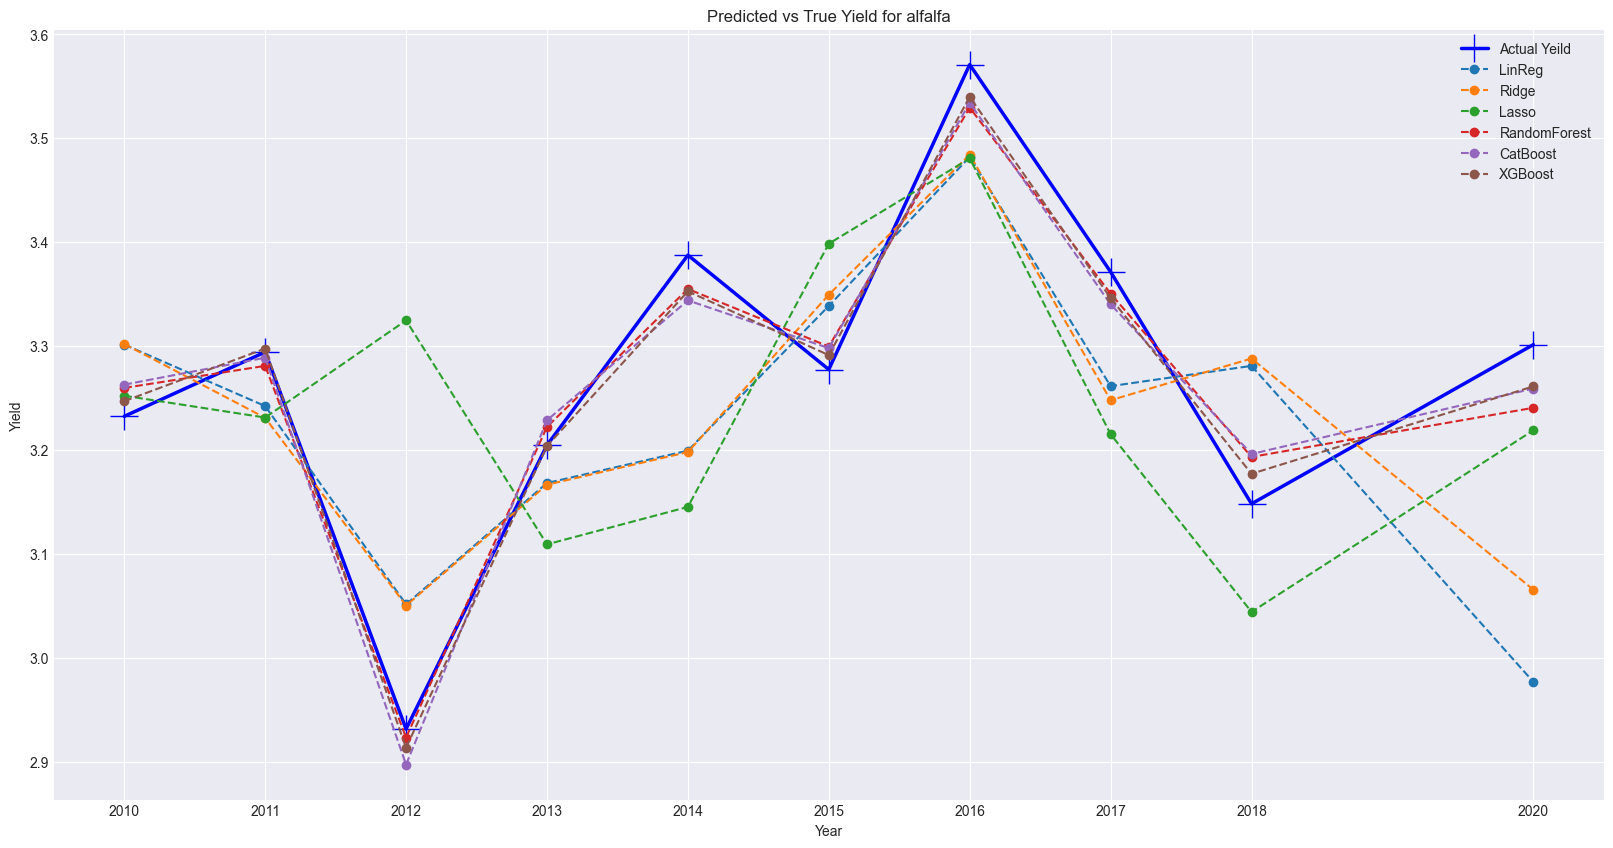

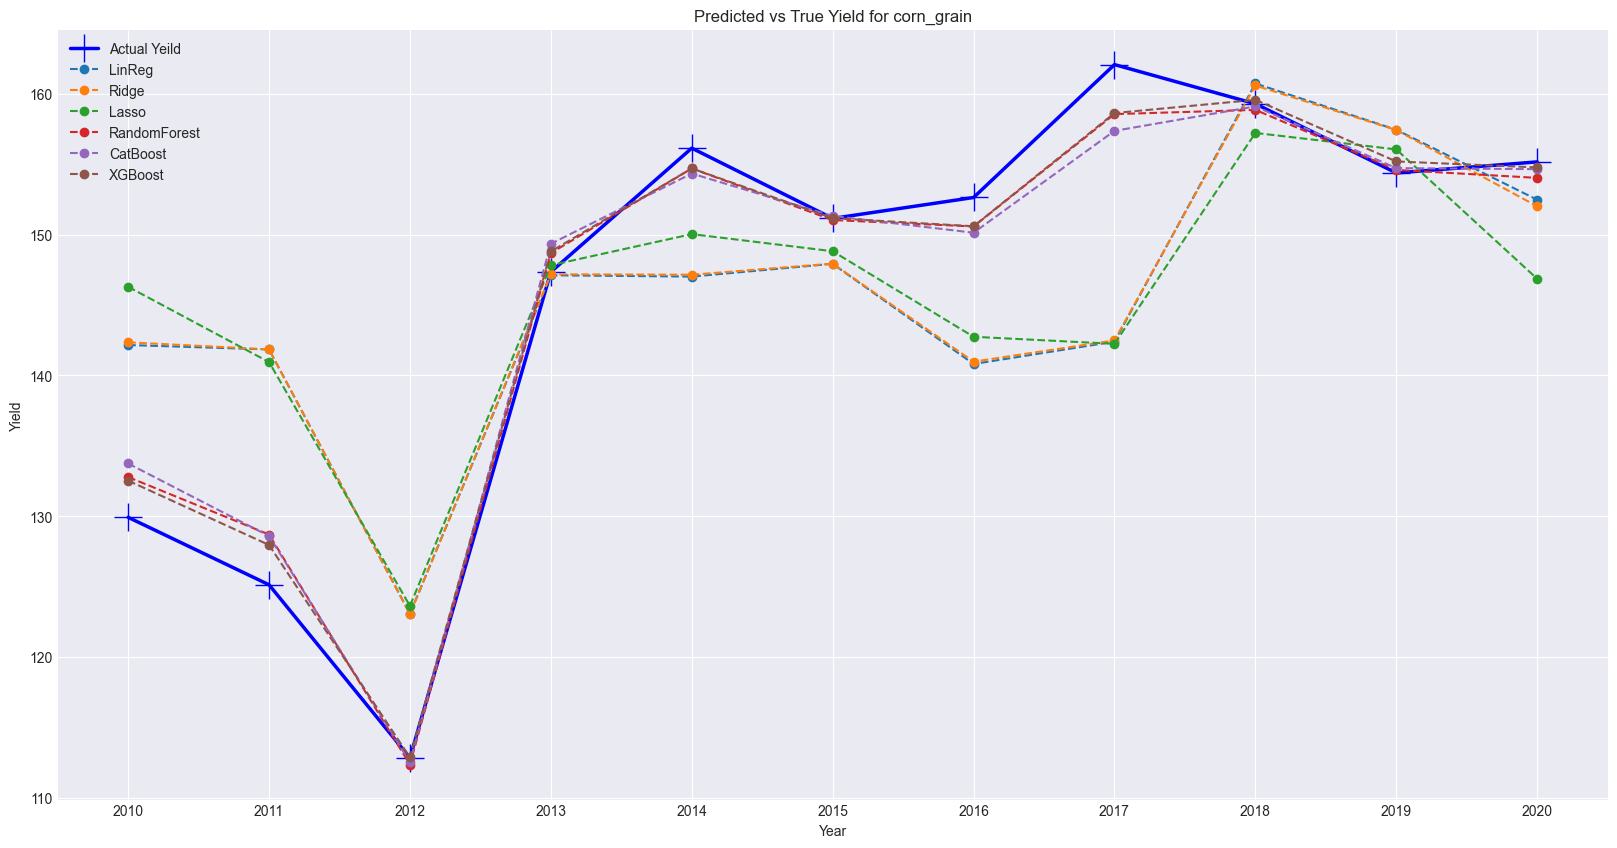

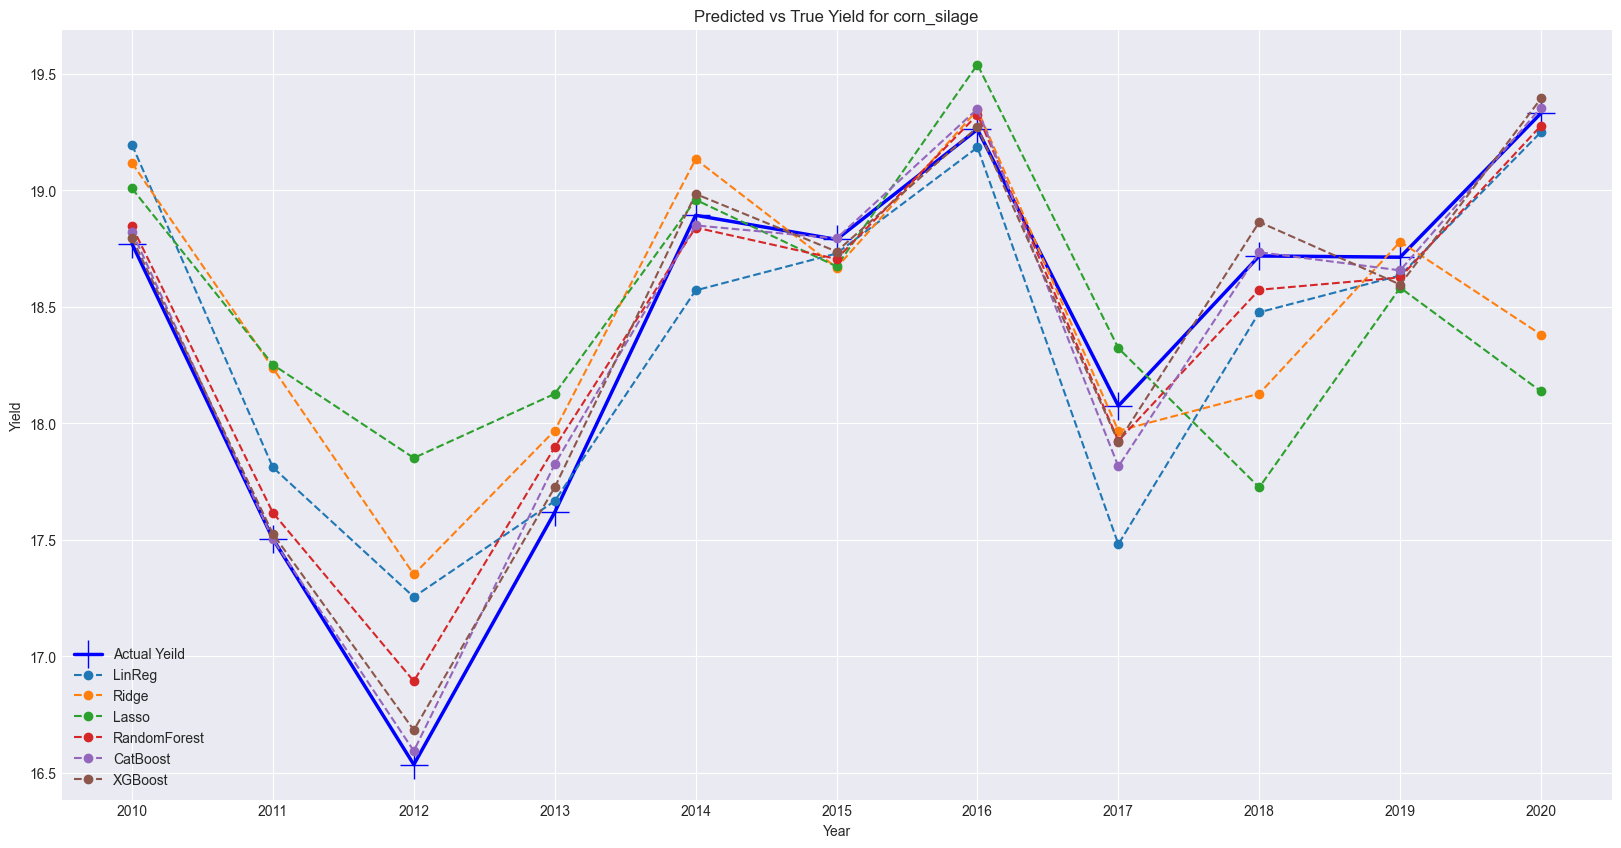

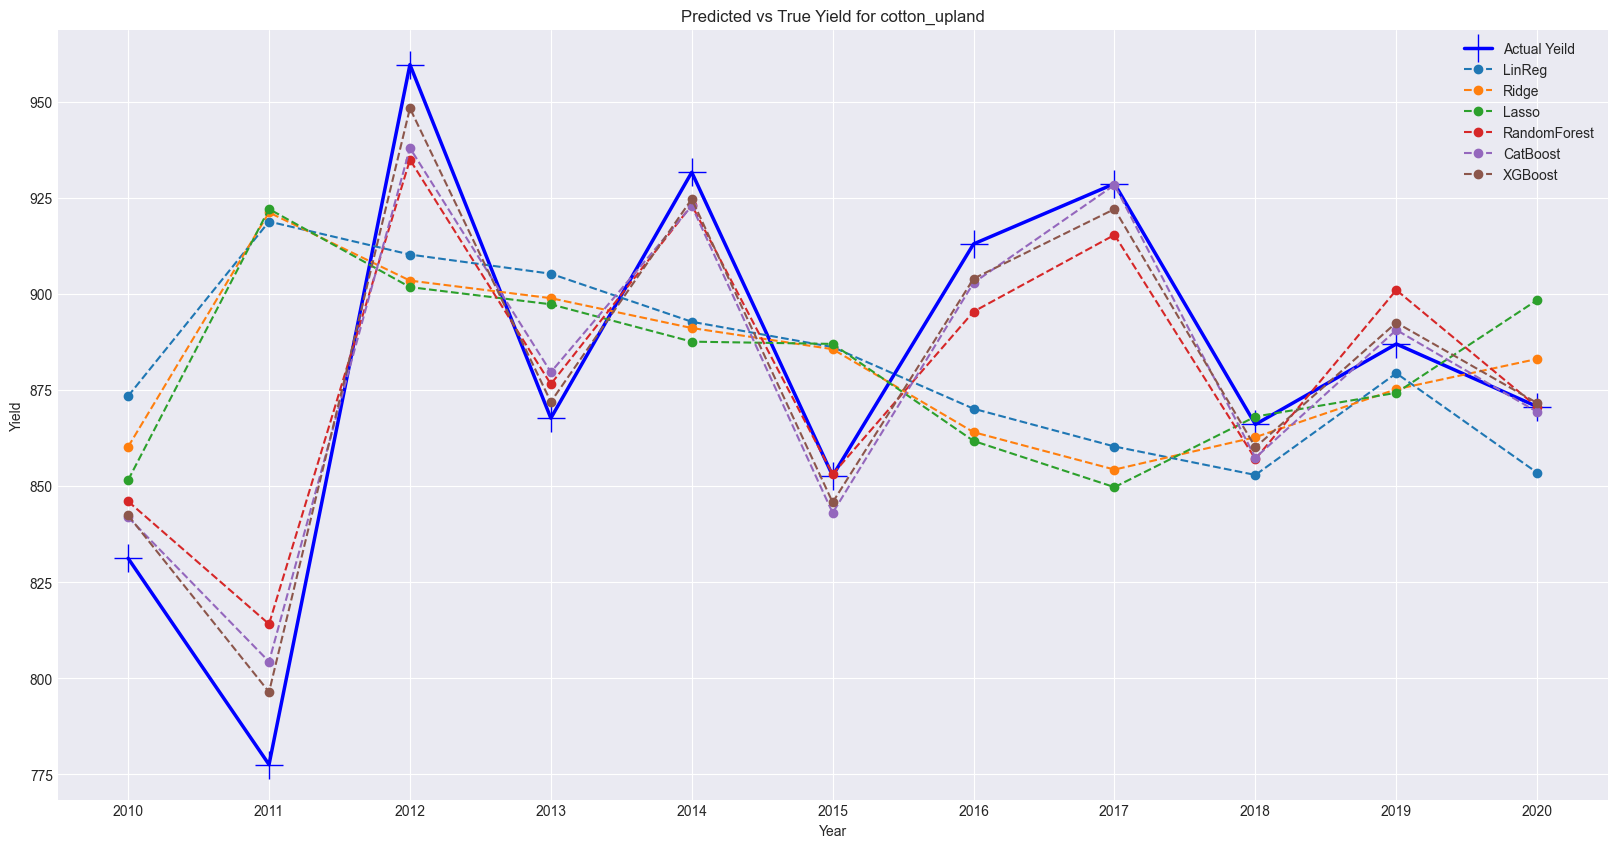

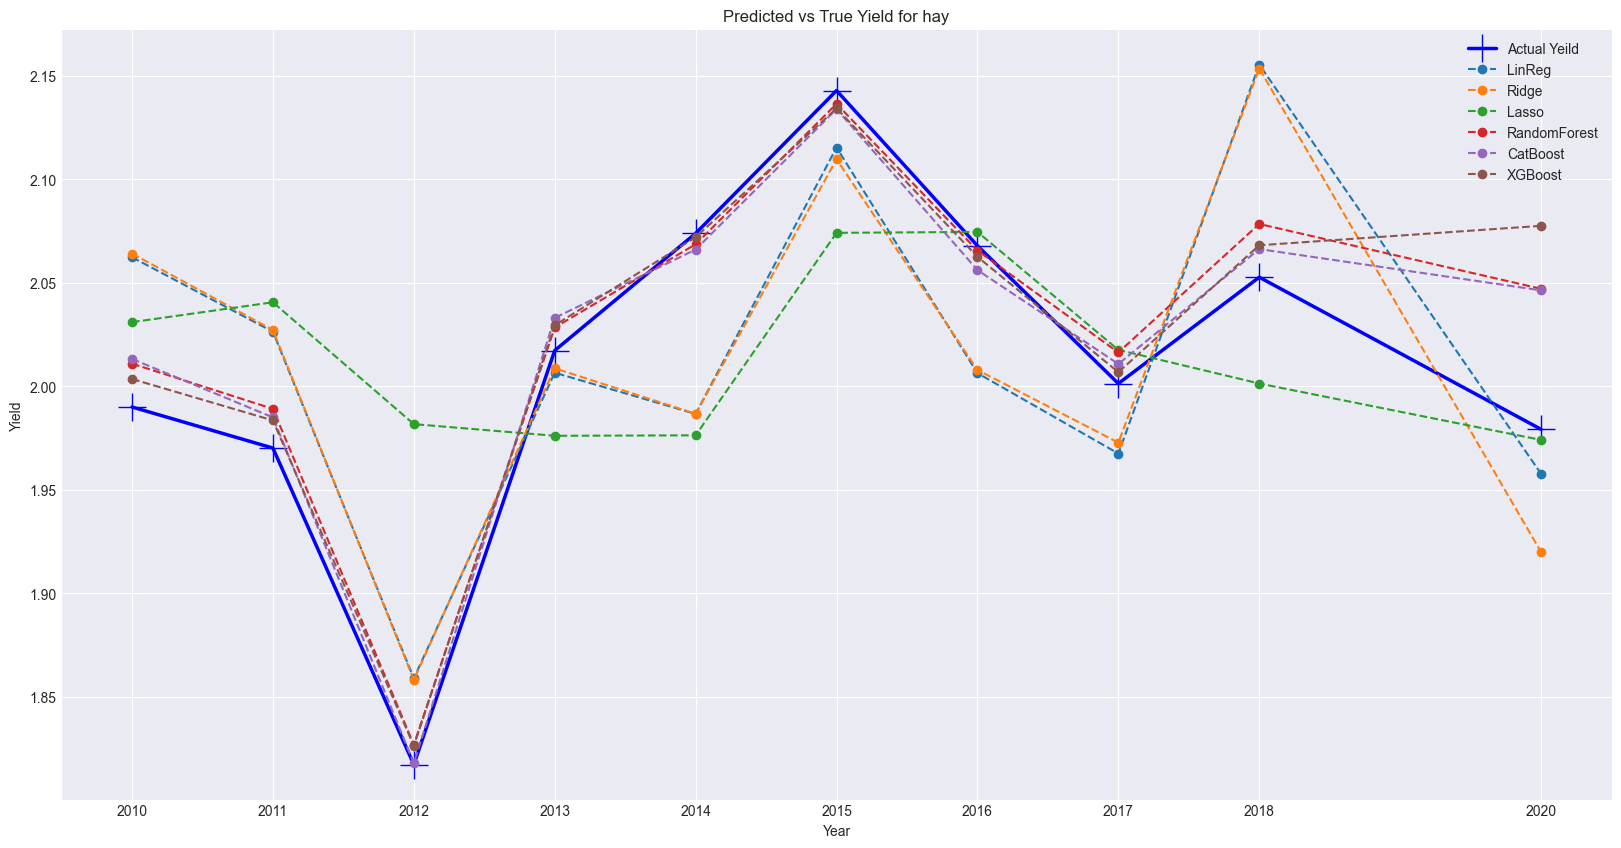

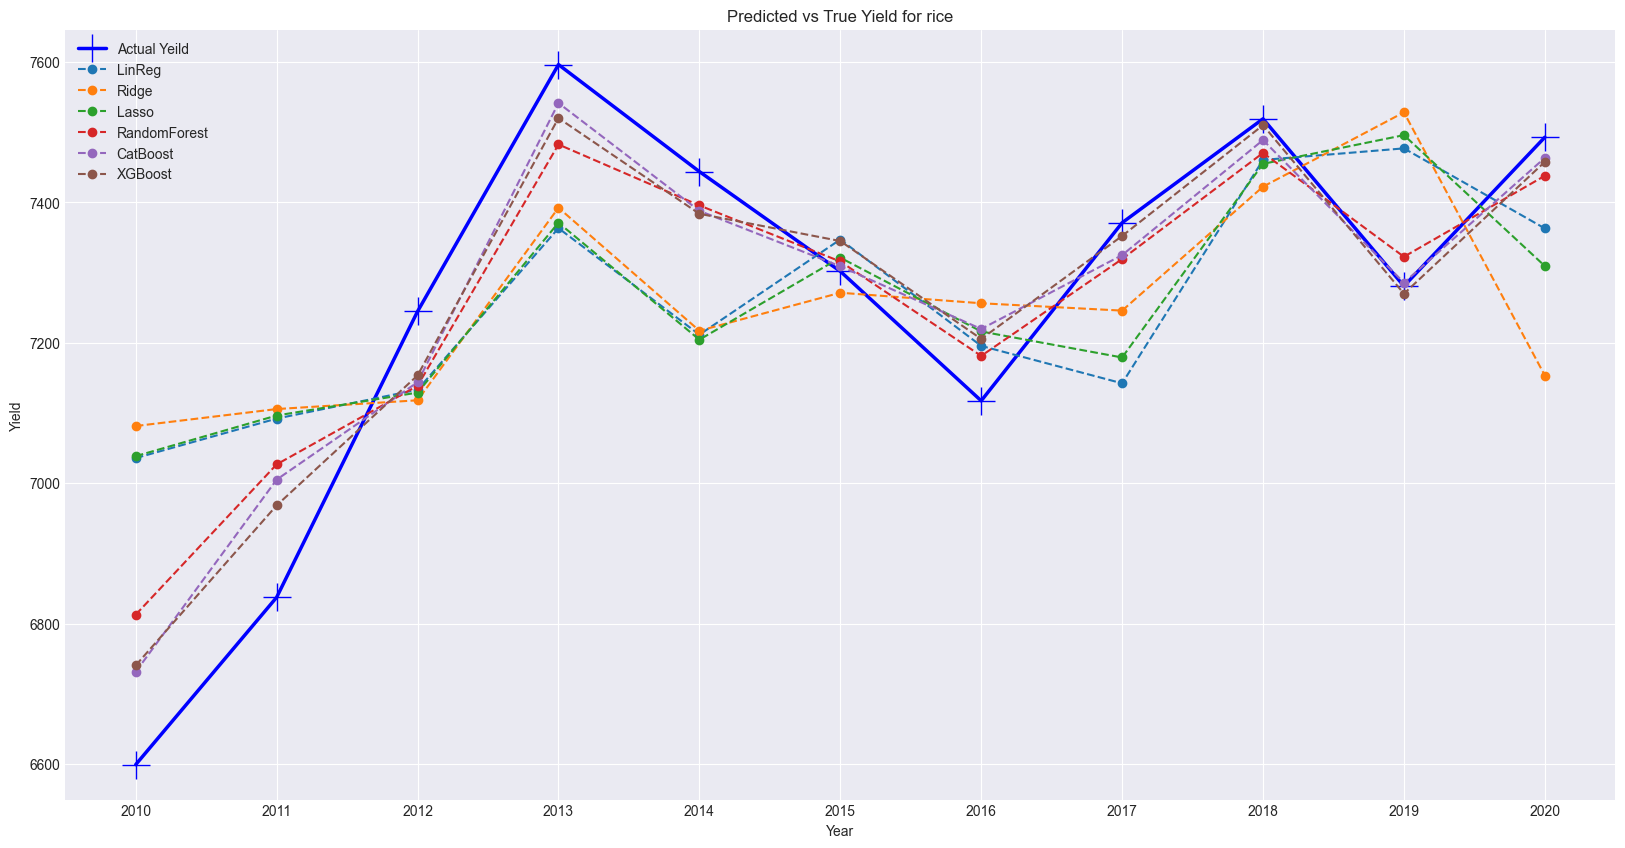

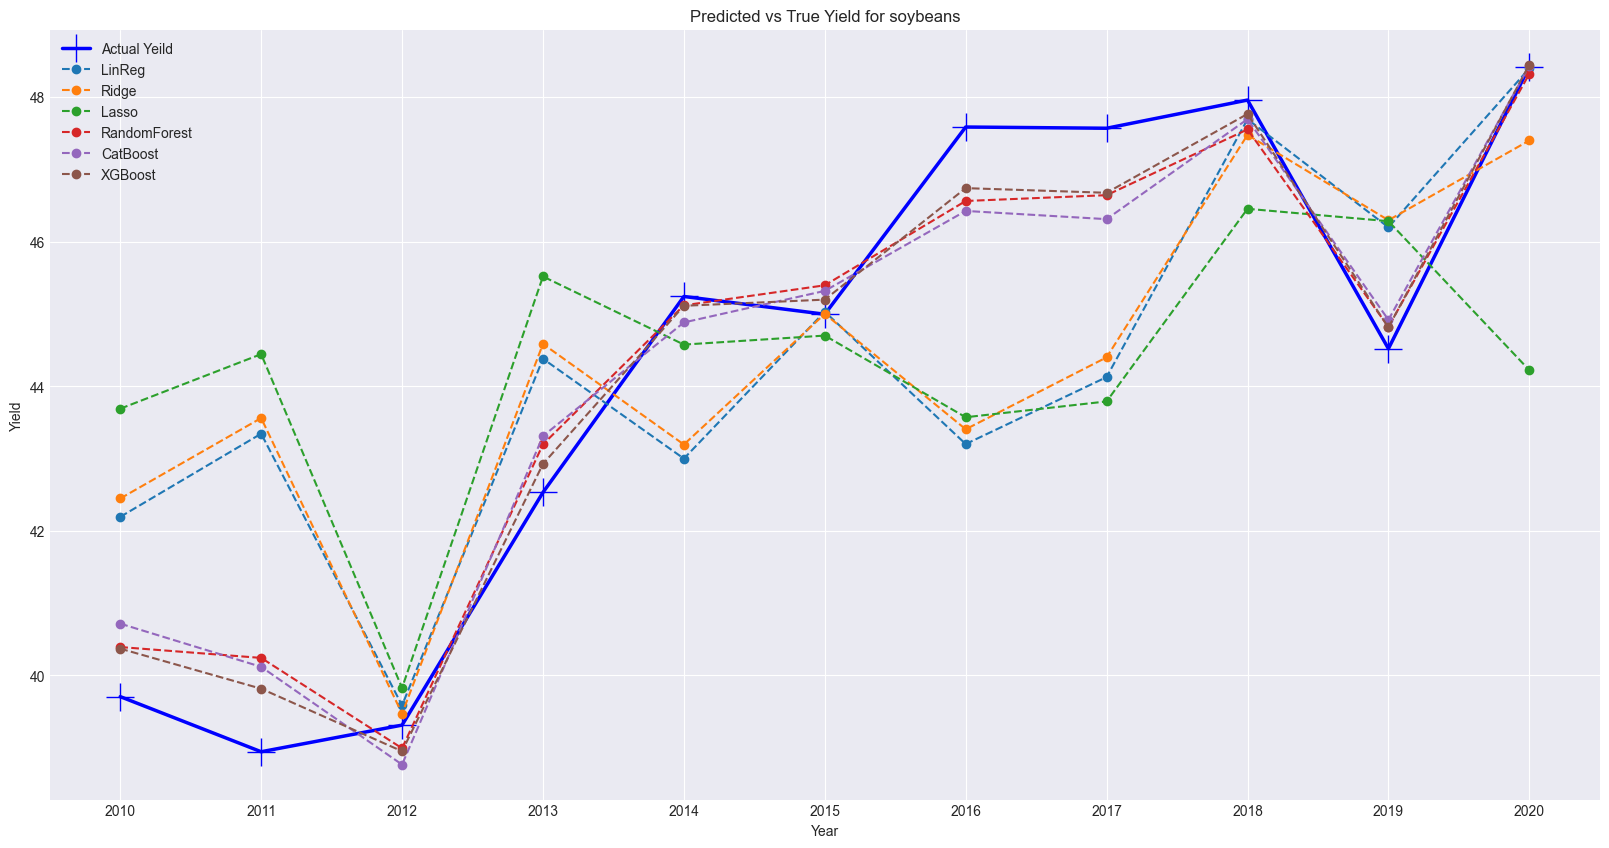

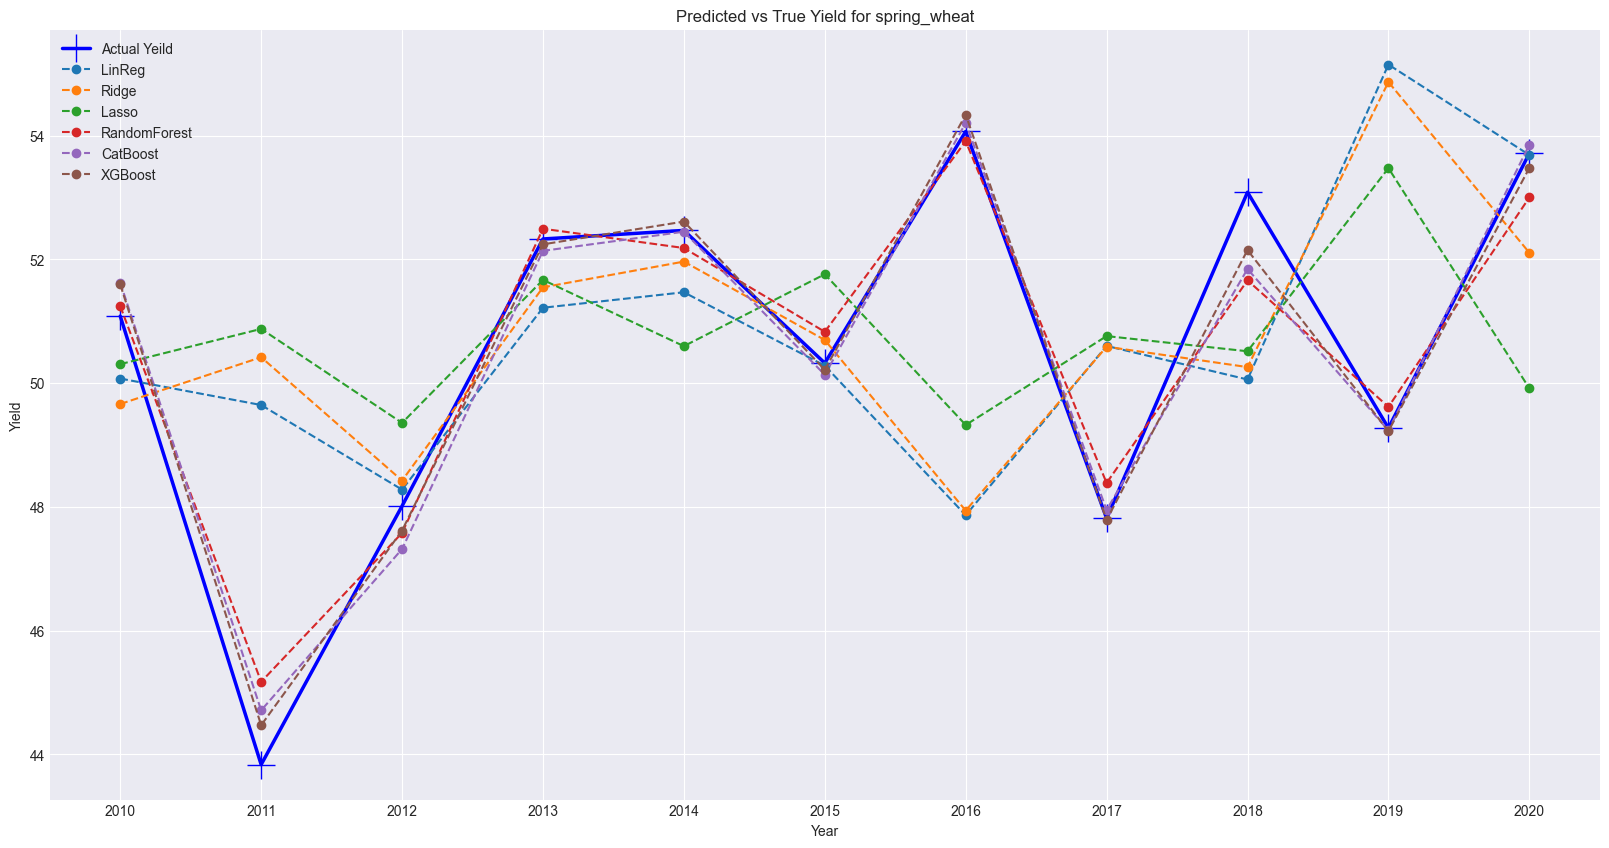

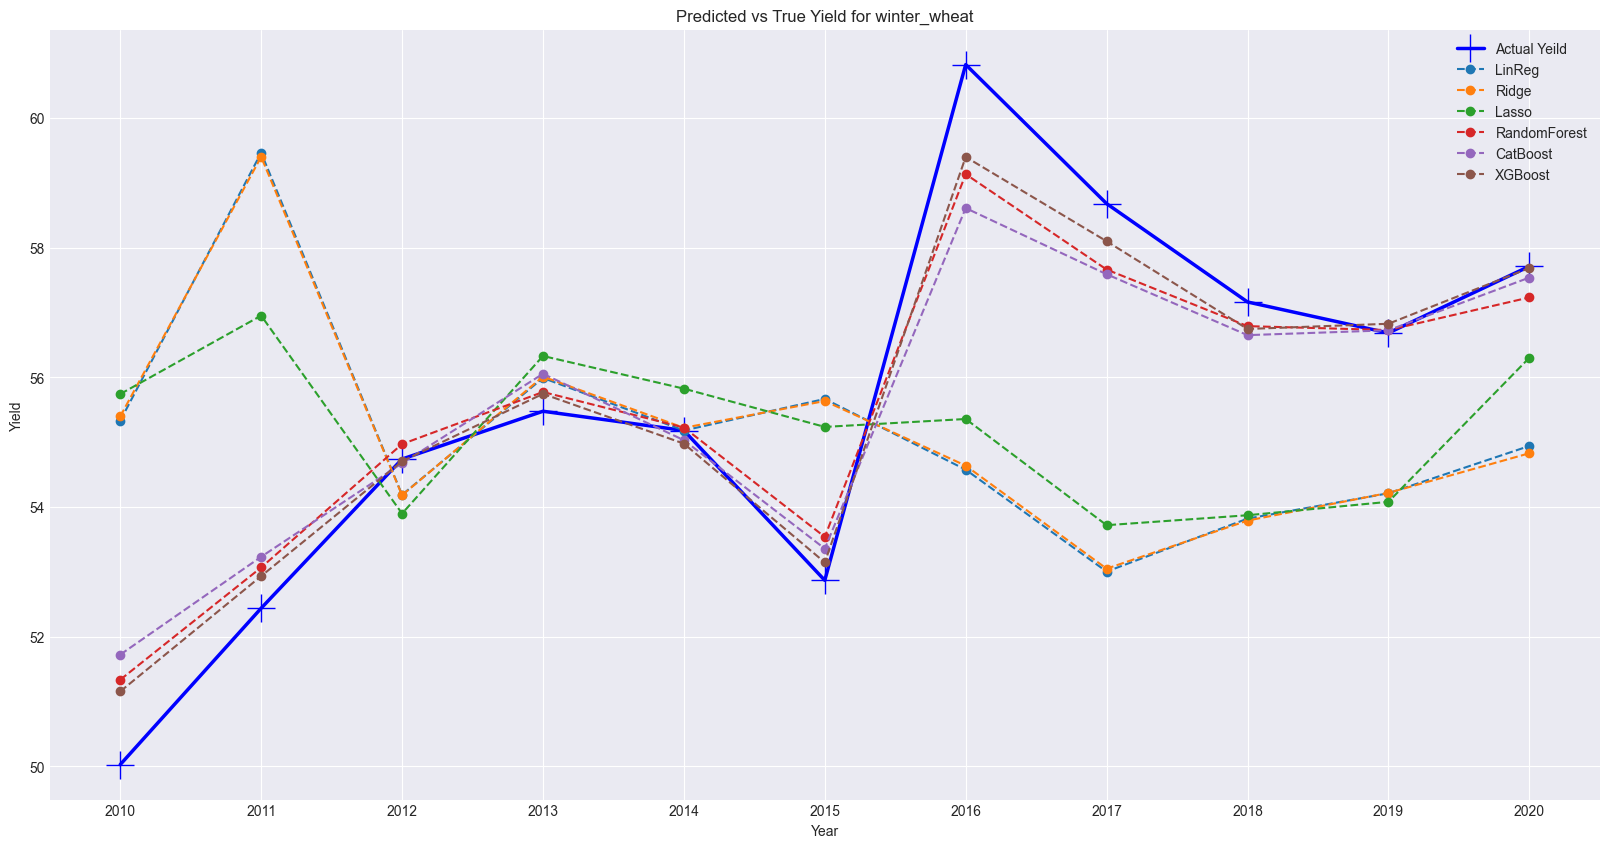

In [104]:
plot_yearly_stats(models, crop_types, crop_dict, aggr_func=np.mean)